In [1]:
#Data Manipulation
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


import nltk#Natural Language Tool Kit

import re
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer

#!pip install spacy
import spacy

#Visualisation
import gensim
from gensim import corpora

In [2]:
%pwd

'C:\\Users\\Subhasmita Purohit\\Documents\\TweetScraper'

In [3]:
%cd C:\Users\Subhasmita Purohit\Documents\TweetScraper\TweetScraper-master

C:\Users\Subhasmita Purohit\Documents\TweetScraper\TweetScraper-master


In [4]:
#Read the csv file
df=pd.read_csv("EconomicSlowdown.csvTweets.csv", sep=',')

In [5]:
#Display
df

,usernameTweet,ID,text,url,nbr_retweet,nbr_favorite,nbr_reply,datetime,is_reply,is_retweet,user_id,has_media,medias
0,MysticShyam,1200214507970125824,Over Seven Thousand engineers had applied for ...,/MysticShyam/status/1200214507970125824,0,0,0,2019-11-29 06:16:52,False,False,134442249,NaN,NaN
1,prashantagrvns,1200223389970882560,""" फोकसबाजी "" की भी लिमिट होती है। हद है। It ma...",/prashantagrvns/status/1200223389970882560,0,0,0,2019-11-29 06:52:09,False,False,1334068722,NaN,NaN
2,prashantagrvns,1200225126677012481,Optics doesn't works for economy.\n#EconomicSl...,/prashantagrvns/status/1200225126677012481,0,0,0,2019-11-29 06:59:03,False,False,1334068722,NaN,NaN
3,bsindia,1200229137618788352,# BestOfBSOpinion | Tackling #EconomicSlowdow...,/bsindia/status/1200229137618788352,1,5,0,2019-11-29 07:15:00,False,False,43855487,True,['https://t.co/no6TU8p0uP']
4,nikita_vashisht,1200235703889612800,If the #RBI cuts #InterestRates during the D...,/nikita_vashisht/status/1200235703889612800,1,1,0,2019-11-29 07:41:05,False,False,794424401550868481,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,AuManufacturing,1201265548627075072,The Australian Industry Group’s November PMI s...,/AuManufacturing/status/1201265548627075072,1,1,0,2019-12-02 03:53:19,False,False,2856028454,True,['https://t.co/KwjbiL9P6X']
3995,NickReichert,1201274282044735488,Recession Preparation Checklist\n https:// buf...,/NickReichert/status/1201274282044735488,3,0,0,2019-12-02 04:28:02,False,False,797609485,NaN,NaN
3996,Brooklynmonk,1201275137120714753,The reason China has a higher GDP growth rate ...,/Brooklynmonk/status/1201275137120714753,0,0,0,2019-12-02 04:31:25,True,False,125873258,NaN,NaN
3997,i1n1,1201282780451213312,# ModiGovt PUMPING $1.39 trillion of economic...,/i1n1/status/1201282780451213312,0,1,0,2019-12-02 05:01:48,False,False,311671135,NaN,NaN


In [6]:
#to check no. of tweets
df.shape

(3999, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
usernameTweet    3999 non-null object
ID               3999 non-null int64
text             3999 non-null object
url              3999 non-null object
nbr_retweet      3999 non-null int64
nbr_favorite     3999 non-null int64
nbr_reply        3999 non-null int64
datetime         3999 non-null object
is_reply         3999 non-null bool
is_retweet       3999 non-null bool
user_id          3999 non-null int64
has_media        429 non-null object
medias           429 non-null object
dtypes: bool(2), int64(5), object(6)
memory usage: 351.6+ KB


In [8]:
df['usernameTweet'].value_counts()

divadas            20
bsindia            19
VinayDokania       17
umakantsingh_IN    17
i_theindian        14
                   ..
tejasgujarathi      1
faiyazasm           1
rajan_saurav        1
ganeshukla07        1
ROKIBUZZAMAN2       1
Name: usernameTweet, Length: 2889, dtype: int64

In [9]:
df['datetime'].value_counts()

2019-11-29 19:05:57    3
2019-11-29 18:44:13    3
2019-11-29 21:01:57    3
2019-11-29 20:25:35    3
2019-11-29 21:08:47    3
                      ..
2019-11-29 18:24:27    1
2019-11-30 08:47:41    1
2019-11-29 22:00:52    1
2019-11-30 12:39:56    1
2019-11-29 21:59:13    1
Name: datetime, Length: 3866, dtype: int64

## Cleaning the tweets

In [10]:
#assign to other variable so if lose the data in futeure we ca access the original data in df
df1=df

In [11]:
df1.columns

Index(['usernameTweet', 'ID', 'text', 'url', 'nbr_retweet', 'nbr_favorite',
       'nbr_reply', 'datetime', 'is_reply', 'is_retweet', 'user_id',
       'has_media', 'medias'],
      dtype='object')

Here drop unnecessary columns like user id, medias, has_medias, datetime(this is fix Nov29 to Dec 2), is_reply, is_retweet,nbr_reply. Leave usernameaTweet, nbr_retweet and and nbr_favorite. Why?To explore then remove.

In [12]:
#If feel like useful check before drop the columns
df1['is_reply'].value_counts()

False    3587
True      412
Name: is_reply, dtype: int64

In [13]:
df1['is_retweet'].value_counts()
#Useless as all the records have the same values

False    3999
Name: is_retweet, dtype: int64

In [14]:
df1['nbr_retweet'].value_counts()

0      2857
1       441
2       175
3       107
4        58
       ... 
164       1
134       1
132       1
126       1
236       1
Name: nbr_retweet, Length: 94, dtype: int64

In [15]:
df1['nbr_retweet'].describe()

count    3999.000000
mean        4.782946
std        73.144966
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max      4219.000000
Name: nbr_retweet, dtype: float64

In [16]:
df1['nbr_favorite'].value_counts()

0       1833
1        813
2        379
3        192
4        132
        ... 
59         1
63         1
67         1
71         1
1949       1
Name: nbr_favorite, Length: 148, dtype: int64

In [17]:
df1['nbr_favorite'].describe()

count     3999.000000
mean        14.192048
std        229.084067
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max      12741.000000
Name: nbr_favorite, dtype: float64

In [18]:
df1['has_media']

0        NaN
1        NaN
2        NaN
3       True
4        NaN
        ... 
3994    True
3995     NaN
3996     NaN
3997     NaN
3998     NaN
Name: has_media, Length: 3999, dtype: object

In [19]:
#to check how many null values are there
df1['has_media'].isnull().sum()

3570

In [20]:
df1['medias'].isnull().sum()

3570

In [21]:
df1['medias']

0                               NaN
1                               NaN
2                               NaN
3       ['https://t.co/no6TU8p0uP']
4                               NaN
                   ...             
3994    ['https://t.co/KwjbiL9P6X']
3995                            NaN
3996                            NaN
3997                            NaN
3998                            NaN
Name: medias, Length: 3999, dtype: object

In [22]:
df1=df1.drop(['medias','has_media','user_id','url','is_reply','is_retweet','ID','nbr_reply'],axis=1)

In [23]:
#after drop unnecessary columns check the size of the data frame
df1.shape

(3999, 5)

In [24]:
df1.columns

Index(['usernameTweet', 'text', 'nbr_retweet', 'nbr_favorite', 'datetime'], dtype='object')

In [25]:
df1=df1.drop(['usernameTweet','nbr_retweet', 'nbr_favorite'],axis=1)

In [26]:
df1.shape

(3999, 2)

In [27]:
df1['text']

0       Over Seven Thousand engineers had applied for ...
1       " फोकसबाजी " की भी लिमिट होती है। हद है। It ma...
2       Optics doesn't works for economy.\n#EconomicSl...
3       # BestOfBSOpinion  | Tackling #EconomicSlowdow...
4       If the #RBI  cuts #InterestRates  during the D...
                              ...                        
3994    The Australian Industry Group’s November PMI s...
3995    Recession Preparation Checklist\n https:// buf...
3996    The reason China has a higher GDP growth rate ...
3997    # ModiGovt  PUMPING $1.39 trillion of economic...
3998    # GDPGrowth  India's ambitious $5 Trillion eco...
Name: text, Length: 3999, dtype: object

In [28]:
#Final table on which main task will perform
df2=df1

In [29]:
df2

,text,datetime
0,Over Seven Thousand engineers had applied for ...,2019-11-29 06:16:52
1,""" फोकसबाजी "" की भी लिमिट होती है। हद है। It ma...",2019-11-29 06:52:09
2,Optics doesn't works for economy.\n#EconomicSl...,2019-11-29 06:59:03
3,# BestOfBSOpinion | Tackling #EconomicSlowdow...,2019-11-29 07:15:00
4,If the #RBI cuts #InterestRates during the D...,2019-11-29 07:41:05
...,...,...
3994,The Australian Industry Group’s November PMI s...,2019-12-02 03:53:19
3995,Recession Preparation Checklist\n https:// buf...,2019-12-02 04:28:02
3996,The reason China has a higher GDP growth rate ...,2019-12-02 04:31:25
3997,# ModiGovt PUMPING $1.39 trillion of economic...,2019-12-02 05:01:48


In [30]:
#Change the column name from text to tweets
df2=df2[['text']]
df2.columns=['tweet']

In [31]:
df2

,tweet
0,Over Seven Thousand engineers had applied for ...
1,""" फोकसबाजी "" की भी लिमिट होती है। हद है। It ma..."
2,Optics doesn't works for economy.\n#EconomicSl...
3,# BestOfBSOpinion | Tackling #EconomicSlowdow...
4,If the #RBI cuts #InterestRates during the D...
...,...
3994,The Australian Industry Group’s November PMI s...
3995,Recession Preparation Checklist\n https:// buf...
3996,The reason China has a higher GDP growth rate ...
3997,# ModiGovt PUMPING $1.39 trillion of economic...


In [32]:
#cross check the tweets
df2['tweet'].value_counts()

# EconomicSlowdown  becomes worse thanks to Modi Govt’s stupidity & incompetence\n\nGDP Growth: 4.5%\nManufacturing Growth: -1%\nIndustry Growth: -0.46%\nAgriculture Growth: 2% \n\nRemember that Govt has manipulated data according to many economists, real growth might be around 1-2% only!    36
# StopPrivatizationRally  Stop privatization of \n1. BSNL/MTNL\n2. BPCL\n3. Railway\n4. Air India\n5. HAL\n6. NTPC \nThe people of India have equally stake in these PSU and govt. Organisation, and have a right to be employed.These are not for cronies and their families. #EconomicSlowdown      6
Breaking - GDP at 4.5%, lowest in 6 years. Manufacturing growth at -1%. It’s havoc. How we all gonna survive?\n#GDP  #EconomicSlowdown                                                                                                                                                                6
For Andh bhakts\n\n#EconomicSlowdown  is normal issue\nNothing related to country development\nBut\n#SaveMetroSa

In [33]:
#Calculate the length of each tweet
def getlength(tweets):
    tweets_tokens=tweets.split(" ")
    return len(tweets_tokens)

In [34]:
#Create an another column to store length of each tweet
df2['tweet_len']=df2['tweet'].apply(lambda x:getlength(x))
df2['tweet_len']

0       28
1       23
2       12
3       31
4       53
        ..
3994    42
3995    50
3996    52
3997    31
3998    15
Name: tweet_len, Length: 3999, dtype: int64

In [35]:
df2

,tweet,tweet_len
0,Over Seven Thousand engineers had applied for ...,28
1,""" फोकसबाजी "" की भी लिमिट होती है। हद है। It ma...",23
2,Optics doesn't works for economy.\n#EconomicSl...,12
3,# BestOfBSOpinion | Tackling #EconomicSlowdow...,31
4,If the #RBI cuts #InterestRates during the D...,53
...,...,...
3994,The Australian Industry Group’s November PMI s...,42
3995,Recession Preparation Checklist\n https:// buf...,50
3996,The reason China has a higher GDP growth rate ...,52
3997,# ModiGovt PUMPING $1.39 trillion of economic...,31


In [36]:
df2['tweet_len'].describe()

count    3999.000000
mean       28.590398
std        13.179060
min         2.000000
25%        17.000000
50%        28.000000
75%        40.000000
max        92.000000
Name: tweet_len, dtype: float64

Text(0.5, 1.0, ' Distribution of Length of Tweet')

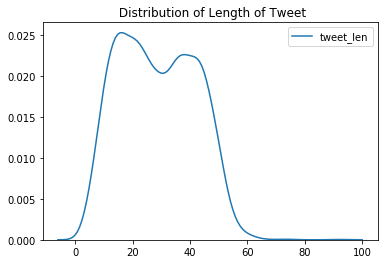

In [37]:
sns.kdeplot(df2['tweet_len']).set_title(" Distribution of Length of Tweet")

In [38]:
#For other hastags
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)   

In [39]:
df2['hashtags']=df2.tweet.apply(find_hashtags)

In [40]:
df2

,tweet,tweet_len,hashtags
0,Over Seven Thousand engineers had applied for ...,28,"[#economicslowdown, #nojobs, #hiddencapitalism..."
1,""" फोकसबाजी "" की भी लिमिट होती है। हद है। It ma...",23,"[#economyderailed, #EconomicSlowdown]"
2,Optics doesn't works for economy.\n#EconomicSl...,12,[#EconomicSlowdown]
3,# BestOfBSOpinion | Tackling #EconomicSlowdow...,31,"[#EconomicSlowdown, #BSOpinion]"
4,If the #RBI cuts #InterestRates during the D...,53,"[#RBI, #InterestRates, #MPC, #rate, #GDP, #Eco..."
...,...,...,...
3994,The Australian Industry Group’s November PMI s...,42,"[#auspol, #EconomicSlowdown]"
3995,Recession Preparation Checklist\n https:// buf...,50,"[#recession, #investing, #economy, #bitcoin, #..."
3996,The reason China has a higher GDP growth rate ...,52,"[#China, #economy, #tradewar, #GDPgrowth]"
3997,# ModiGovt PUMPING $1.39 trillion of economic...,31,"[#ModiLies, #BJP, #BJPHataoDeshBachao, #bjp_dr..."


In [41]:
df2['hashtags'].describe()

count                    3999
unique                   1646
top       [#EconomicSlowdown]
freq                     1112
Name: hashtags, dtype: object

In [42]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = df2.loc[
                       df2.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [43]:
hashtags_list_df

,hashtags
0,"[#economicslowdown, #nojobs, #hiddencapitalism..."
1,"[#economyderailed, #EconomicSlowdown]"
2,[#EconomicSlowdown]
3,"[#EconomicSlowdown, #BSOpinion]"
4,"[#RBI, #InterestRates, #MPC, #rate, #GDP, #Eco..."
...,...
3994,"[#auspol, #EconomicSlowdown]"
3995,"[#recession, #investing, #economy, #bitcoin, #..."
3996,"[#China, #economy, #tradewar, #GDPgrowth]"
3997,"[#ModiLies, #BJP, #BJPHataoDeshBachao, #bjp_dr..."


In [44]:
#create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtags'])

In [45]:
flattened_hashtags_df

,hashtags
0,#economicslowdown
1,#nojobs
2,#hiddencapitalism
3,#organizedloot
4,#economyderailed
...,...
9631,#bjp_drama
9632,#EconomicSlowdown
9633,#economics
9634,#India


In [46]:
# number of unique hashtags
flattened_hashtags_df['hashtags'].unique().size

1641

In [47]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtags').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

In [48]:
popular_hashtags

,hashtags,counts
0,#EconomicSlowdown,2788
1,#GDPgrowth,625
2,#GDPkeBureDin,491
3,#GDP,454
4,#economy,361
...,...,...
1636,#ModiOut,1
1637,#ModiMade_Socio_Economic_Disaster,1
1638,#ModiLies,1
1639,#ModiHaiTohNamumkinHai,1


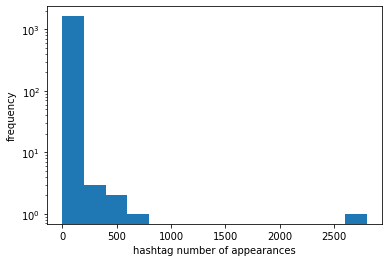

In [49]:
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtags']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+200, 200)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+200, 200)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [50]:
#Removeurl
def removeurl(tweet,replace_tweet=""):
    text="r'^https?:\/\/.*[\r\n]*'"
    return re.sub(text,replace_tweet,tweet)

In [51]:
df2['cleaned_tweet']=df2['tweet'].apply(lambda x:removeurl(x))

In [52]:
#Removeurl
def removeURL(text,replace_text=""):
    re_url=" http:\\S+" #\S+ matched all non-whitespace characters
    return re.sub(re_url,replace_text,text)

In [53]:
df2['cleaned_tweet']=df2['tweet'].apply(lambda x:removeURL(x))

Convert tweets to lower case

In [54]:
df2['cleaned_tweet']=df2['tweet'].apply(lambda x:x.lower())
df2

,tweet,tweet_len,hashtags,cleaned_tweet
0,Over Seven Thousand engineers had applied for ...,28,"[#economicslowdown, #nojobs, #hiddencapitalism...",over seven thousand engineers had applied for ...
1,""" फोकसबाजी "" की भी लिमिट होती है। हद है। It ma...",23,"[#economyderailed, #EconomicSlowdown]",""" फोकसबाजी "" की भी लिमिट होती है। हद है। it ma..."
2,Optics doesn't works for economy.\n#EconomicSl...,12,[#EconomicSlowdown],optics doesn't works for economy.\n#economicsl...
3,# BestOfBSOpinion | Tackling #EconomicSlowdow...,31,"[#EconomicSlowdown, #BSOpinion]",# bestofbsopinion | tackling #economicslowdow...
4,If the #RBI cuts #InterestRates during the D...,53,"[#RBI, #InterestRates, #MPC, #rate, #GDP, #Eco...",if the #rbi cuts #interestrates during the d...
...,...,...,...,...
3994,The Australian Industry Group’s November PMI s...,42,"[#auspol, #EconomicSlowdown]",the australian industry group’s november pmi s...
3995,Recession Preparation Checklist\n https:// buf...,50,"[#recession, #investing, #economy, #bitcoin, #...",recession preparation checklist\n https:// buf...
3996,The reason China has a higher GDP growth rate ...,52,"[#China, #economy, #tradewar, #GDPgrowth]",the reason china has a higher gdp growth rate ...
3997,# ModiGovt PUMPING $1.39 trillion of economic...,31,"[#ModiLies, #BJP, #BJPHataoDeshBachao, #bjp_dr...",# modigovt pumping $1.39 trillion of economic...


In [55]:
df2['cleaned_tweet'].value_counts()

# economicslowdown  becomes worse thanks to modi govt’s stupidity & incompetence\n\ngdp growth: 4.5%\nmanufacturing growth: -1%\nindustry growth: -0.46%\nagriculture growth: 2% \n\nremember that govt has manipulated data according to many economists, real growth might be around 1-2% only!                                                                                                                              36
breaking - gdp at 4.5%, lowest in 6 years. manufacturing growth at -1%. it’s havoc. how we all gonna survive?\n#gdp  #economicslowdown                                                                                                                                                                                                                                                                                          6
# stopprivatizationrally  stop privatization of \n1. bsnl/mtnl\n2. bpcl\n3. railway\n4. air india\n5. hal\n6. ntpc \nthe people of india have equally stake in these

Remove hashtags

In [56]:
def removeHashTag(tweet,replace_tweet=""):
    re_hashtag="#\S+"
    return re.sub(re_hashtag,replace_tweet,tweet)

In [57]:
df2['cleaned_tweet']=df2['cleaned_tweet'].apply(lambda x:removeHashTag(x))

In [58]:
df2

,tweet,tweet_len,hashtags,cleaned_tweet
0,Over Seven Thousand engineers had applied for ...,28,"[#economicslowdown, #nojobs, #hiddencapitalism...",over seven thousand engineers had applied for ...
1,""" फोकसबाजी "" की भी लिमिट होती है। हद है। It ma...",23,"[#economyderailed, #EconomicSlowdown]",""" फोकसबाजी "" की भी लिमिट होती है। हद है। it ma..."
2,Optics doesn't works for economy.\n#EconomicSl...,12,[#EconomicSlowdown],optics doesn't works for economy.\n https://...
3,# BestOfBSOpinion | Tackling #EconomicSlowdow...,31,"[#EconomicSlowdown, #BSOpinion]",# bestofbsopinion | tackling and coping wit...
4,If the #RBI cuts #InterestRates during the D...,53,"[#RBI, #InterestRates, #MPC, #rate, #GDP, #Eco...","if the cuts during the december meeting,..."
...,...,...,...,...
3994,The Australian Industry Group’s November PMI s...,42,"[#auspol, #EconomicSlowdown]",the australian industry group’s november pmi s...
3995,Recession Preparation Checklist\n https:// buf...,50,"[#recession, #investing, #economy, #bitcoin, #...",recession preparation checklist\n https:// buf...
3996,The reason China has a higher GDP growth rate ...,52,"[#China, #economy, #tradewar, #GDPgrowth]",the reason china has a higher gdp growth rate ...
3997,# ModiGovt PUMPING $1.39 trillion of economic...,31,"[#ModiLies, #BJP, #BJPHataoDeshBachao, #bjp_dr...",# modigovt pumping $1.39 trillion of economic...


strips of the whitespaces at the end of the tweets

In [59]:
df2['cleaned_tweet']=df2['cleaned_tweet'].apply(lambda x:x.strip())

In [60]:
# strips of the : at the end of the tweets
df2['cleaned_tweet']=df2['cleaned_tweet'].apply(lambda x:x.strip(":")) 

In [61]:
STOPWORDS=stopwords.words("english")
STOPWORDS

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [62]:
import string
import spacy

In [63]:

def removePunctuations(tweet,replace_tweet=""):
    tweet=tweet.replace("&amp","")
    return tweet.translate(str.maketrans('', replace_tweet, string.punctuation)).strip()

In [64]:
df2['cleaned_tweet']=df2['cleaned_tweet'].apply(lambda x:removePunctuations(x))

In [65]:
#Since this is economicslowdown and gdp growth data, this word will occur very frequently and must be removed

STOPWORDS.append('economicslowdown')
STOPWORDS.append('gdpgrowth')

nlp = spacy.load('en_core_web_sm')

def cleanup_text(docs,allowed_tags=['NOUN', 'PROPN']):
    texts = []
    doc = nlp(docs, disable=['parser', 'ner'])
    if len(allowed_tags)==0:
        tokens = [tok.lemma_ for tok in doc if tok.lemma_ != '-PRON-']
    else:
        tokens = [tok.lemma_ for tok in doc if tok.pos_ in allowed_tags and tok.lemma_ != '-PRON-']
    tokens = [tok.lower().strip() for tok in tokens if tok.lower() not in STOPWORDS]
    
    tokens = ' '.join(tokens)
    texts.append(tokens)
    return texts[0]

In [66]:
df2['cleaned_text']=df2['cleaned_tweet'].apply(lambda x:cleanup_text(x,allowed_tags=[]))

In [67]:
df2

,tweet,tweet_len,hashtags,cleaned_tweet,cleaned_text
0,Over Seven Thousand engineers had applied for ...,28,"[#economicslowdown, #nojobs, #hiddencapitalism...",over seven thousand engineers had applied for ...,seven thousand engineer apply sanitary worker ...
1,""" फोकसबाजी "" की भी लिमिट होती है। हद है। It ma...",23,"[#economyderailed, #EconomicSlowdown]",फोकसबाजी की भी लिमिट होती है। हद है। it may b...,फोकसबाजी की भी लिमिट होती है । हद है । may go...
2,Optics doesn't works for economy.\n#EconomicSl...,12,[#EconomicSlowdown],optics doesnt works for economy\n https twit...,optic work economy https twittercomprashantag...
3,# BestOfBSOpinion | Tackling #EconomicSlowdow...,31,"[#EconomicSlowdown, #BSOpinion]",bestofbsopinion tackling and coping with i...,bestofbsopinion tackling cope fiscal impact ...
4,If the #RBI cuts #InterestRates during the D...,53,"[#RBI, #InterestRates, #MPC, #rate, #GDP, #Eco...",if the cuts during the december meeting ...,cut december meeting would longest cutting...
...,...,...,...,...,...
3994,The Australian Industry Group’s November PMI s...,42,"[#auspol, #EconomicSlowdown]",the australian industry group’s november pmi s...,australian industry group ’s november pmi surv...
3995,Recession Preparation Checklist\n https:// buf...,50,"[#recession, #investing, #economy, #bitcoin, #...",recession preparation checklist\n https buffly...,recession preparation checklist https buffly2...
3996,The reason China has a higher GDP growth rate ...,52,"[#China, #economy, #tradewar, #GDPgrowth]",the reason china has a higher gdp growth rate ...,reason china high gdp growth rate us start mu...
3997,# ModiGovt PUMPING $1.39 trillion of economic...,31,"[#ModiLies, #BJP, #BJPHataoDeshBachao, #bjp_dr...",modigovt pumping 139 trillion of economic pai...,modigovt pump 139 trillion economic painkille...


In [68]:
#Compare the length of raw and clean text 
def getlength(cleaned_text):
    cleaned_text_tokens=cleaned_text.split(" ")
    return len(cleaned_text_tokens)

In [69]:
#Create an another column to store length of each cleaned_text
df2['cleaned_text_len']=df2['cleaned_text'].apply(lambda x:getlength(x))
df2['cleaned_text_len']

0       11
1       17
2        9
3       20
4       28
        ..
3994    35
3995     8
3996    24
3997    15
3998    12
Name: cleaned_text_len, Length: 3999, dtype: int64

In [70]:
df2

,tweet,tweet_len,hashtags,cleaned_tweet,cleaned_text,cleaned_text_len
0,Over Seven Thousand engineers had applied for ...,28,"[#economicslowdown, #nojobs, #hiddencapitalism...",over seven thousand engineers had applied for ...,seven thousand engineer apply sanitary worker ...,11
1,""" फोकसबाजी "" की भी लिमिट होती है। हद है। It ma...",23,"[#economyderailed, #EconomicSlowdown]",फोकसबाजी की भी लिमिट होती है। हद है। it may b...,फोकसबाजी की भी लिमिट होती है । हद है । may go...,17
2,Optics doesn't works for economy.\n#EconomicSl...,12,[#EconomicSlowdown],optics doesnt works for economy\n https twit...,optic work economy https twittercomprashantag...,9
3,# BestOfBSOpinion | Tackling #EconomicSlowdow...,31,"[#EconomicSlowdown, #BSOpinion]",bestofbsopinion tackling and coping with i...,bestofbsopinion tackling cope fiscal impact ...,20
4,If the #RBI cuts #InterestRates during the D...,53,"[#RBI, #InterestRates, #MPC, #rate, #GDP, #Eco...",if the cuts during the december meeting ...,cut december meeting would longest cutting...,28
...,...,...,...,...,...,...
3994,The Australian Industry Group’s November PMI s...,42,"[#auspol, #EconomicSlowdown]",the australian industry group’s november pmi s...,australian industry group ’s november pmi surv...,35
3995,Recession Preparation Checklist\n https:// buf...,50,"[#recession, #investing, #economy, #bitcoin, #...",recession preparation checklist\n https buffly...,recession preparation checklist https buffly2...,8
3996,The reason China has a higher GDP growth rate ...,52,"[#China, #economy, #tradewar, #GDPgrowth]",the reason china has a higher gdp growth rate ...,reason china high gdp growth rate us start mu...,24
3997,# ModiGovt PUMPING $1.39 trillion of economic...,31,"[#ModiLies, #BJP, #BJPHataoDeshBachao, #bjp_dr...",modigovt pumping 139 trillion of economic pai...,modigovt pump 139 trillion economic painkille...,15


Building WordCloud

In [71]:
df2=df2.drop(['cleaned_tweet'],axis=1)

In [72]:
test=""
def clean_text(text):
    ps=PorterStemmer()
    text = text.translate(str.maketrans({key: " {0} ".format(key) for key in string.punctuation}))
    #remove extra white space

    text_cleaned="".join([x for x in text if x not in string.punctuation])
    text_cleaned=re.sub('\n','',text_cleaned)
    text_cleaned=re.sub('\d+','',text_cleaned)
    
    

    text_cleaned=re.sub(' +', ' ', text_cleaned)
    
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS]
    text_cleaned=" ".join([ps.stem(token) for token in tokens])    
    
    return text_cleaned


print(clean_text(test))

In [73]:
df2['cleaned_text']=df2['cleaned_text'].apply(lambda x:clean_text(x))
df2.head()

,tweet,tweet_len,hashtags,cleaned_text,cleaned_text_len
0,Over Seven Thousand engineers had applied for ...,28,"[#economicslowdown, #nojobs, #hiddencapitalism...",seven thousand engin appli sanitari worker pos...,11
1,""" फोकसबाजी "" की भी लिमिट होती है। हद है। It ma...",23,"[#economyderailed, #EconomicSlowdown]",फोकसबाजी की भी लिमिट होती है । हद है । may goo...,17
2,Optics doesn't works for economy.\n#EconomicSl...,12,[#EconomicSlowdown],optic work economi http twittercomprashantagrv...,9
3,# BestOfBSOpinion | Tackling #EconomicSlowdow...,31,"[#EconomicSlowdown, #BSOpinion]",bestofbsopinion tackl cope fiscal impact domin...,20
4,If the #RBI cuts #InterestRates during the D...,53,"[#RBI, #InterestRates, #MPC, #rate, #GDP, #Eco...",cut decemb meet would longest cut spree least...,28


In [74]:
df2_text=" ".join(df2['cleaned_text'])

In [75]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

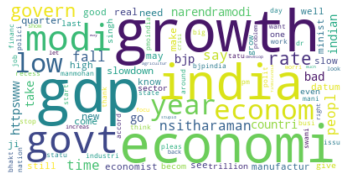

In [76]:
wordcloud = WordCloud(max_font_size=70, max_words=100, background_color="white",collocations=False).generate(df2_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

From the word cloud we can see that people are mostly talking about gdp growth and economic goes down talk about India, Govt. Bjp, narendra modi in some corner, Mostly they speak all negative as word like low, bad are appear in the word cloud we can see that.

As unigram doesn't give an accurate output we can try for 

In [77]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from operator import itemgetter

In [78]:
def getBigrams(df2_text):
    df2_tokens=nltk.word_tokenize(df2_text)
    
    tweet=nltk.Text(df2_tokens)
    
    tweet=[word for word in tweet if word!="." and len(word)>1 and word!="'s"]
    
    finder = BigramCollocationFinder.from_words(tweet)
    
    bigram_measures = BigramAssocMeasures()
    
    scored = finder.score_ngrams(bigram_measures.raw_freq)
    
    scoredList = sorted(scored, key=itemgetter(1), reverse=True)
    
    return scoredList

In [79]:
scoredList=getBigrams(df2_text)
scoredList

[(('gdp', 'growth'), 0.008350730688935281),
 (('growth', 'rate'), 0.0033924843423799585),
 (('india', 'gdp'), 0.0033738443185207276),
 (('indian', 'economi'), 0.002143602743811512),
 (('modi', 'govt'), 0.0020131225767968984),
 (('manmohan', 'singh'), 0.0019944825529376676),
 (('manufactur', 'growth'), 0.0017335222189084401),
 (('econom', 'growth'), 0.0013420817178645989),
 (('real', 'growth'), 0.0012675216224276766),
 (('industri', 'growth'), 0.0011929615269907546),
 (('econom', 'slowdown'), 0.001174321503131524),
 (('growth', 'fall'), 0.001174321503131524),
 (('growth', 'industri'), 0.0011556814792722935),
 (('thank', 'modi'), 0.0011556814792722935),
 (('agricultur', 'growth'), 0.0011370414554130628),
 (('gdp', 'low'), 0.0011370414554130628),
 (('growth', 'agricultur'), 0.0011370414554130628),
 (('growth', 'may'), 0.0011184014315538324),
 (('becom', 'bad'), 0.001099761407694602),
 (('financ', 'minist'), 0.001099761407694602),
 (('bad', 'thank'), 0.0010811213838353712),
 (('growth', 'm

In [80]:
word_dict={}
listLen=len(scoredList)
for i in range(listLen):
    word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]

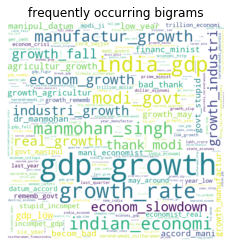

In [81]:
WC_height =700
WC_width =700
WC_max_words =250
 
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,background_color="white")
 
wordCloud.generate_from_frequencies(word_dict)
 
plt.title("frequently occurring bigrams")
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Improving Bigram

In [82]:
allowed_postags=['NOUN', 'PROPN', 'NUM']
df2['cleaned_text_2']=df2['cleaned_text'].apply(lambda x:cleanup_text(x,allowed_tags=allowed_postags))

In [83]:
df2[['tweet','cleaned_text_2']].head()

,tweet,cleaned_text_2
0,Over Seven Thousand engineers had applied for ...,seven thousand engin appli sanitari worker pos...
1,""" फोकसबाजी "" की भी लिमिट होती है। हद है। It ma...",भी होती है हद है । tool work economi
2,Optics doesn't works for economy.\n#EconomicSl...,work economi statu
3,# BestOfBSOpinion | Tackling #EconomicSlowdow...,bestofbsopinion tackl impact domin opinion pag...
4,If the #RBI cuts #InterestRates during the D...,decemb meet spree yr q today watch rbi rbi twi...


In [84]:
df2_text_2=" ".join(df2['cleaned_text_2'])

In [85]:
scoredList_2=getBigrams(df2_text_2)
scoredList_2

[(('gdp', 'growth'), 0.011581819117722757),
 (('india', 'gdp'), 0.004761414526174911),
 (('growth', 'rate'), 0.004658465022906264),
 (('manmohan', 'singh'), 0.0027538992124363),
 (('modi', 'govt'), 0.0027281618366191383),
 (('manufactur', 'growth'), 0.0023935759509960365),
 (('growth', 'growth'), 0.002007515313738611),
 (('growth', 'govt'), 0.0017244041797498328),
 (('agricultur', 'growth'), 0.0015699799248468627),
 (('econom', 'slowdown'), 0.0015699799248468627),
 (('growth', 'agricultur'), 0.0015699799248468627),
 (('becom', 'modi'), 0.001544242549029701),
 (('econom', 'growth'), 0.001544242549029701),
 (('growth', 'manufactur'), 0.001544242549029701),
 (('manipul', 'datum'), 0.0014927677973953775),
 (('dr', 'manmohan'), 0.001467030421578216),
 (('growth', 'year'), 0.001467030421578216),
 (('accord', 'mani'), 0.0014412930457610542),
 (('govt', 'incompet'), 0.0014412930457610542),
 (('mani', 'economist'), 0.0014412930457610542),
 (('datum', 'accord'), 0.0014155556699438924),
 (('govt'

In [86]:
#After so much cleaning, mining and manipulationalso there are lots of unnecessary words are present which create problem at the end so we have to identifiin how many rows they are present
df2[df2['cleaned_text'].str.contains("httpswww","twittercom")]

,tweet,tweet_len,hashtags,cleaned_text,cleaned_text_len,cleaned_text_2
8,# India shock #GDP DECLINE=saw 4.2%-4.5% est...,45,"[#GDP, #Modi, #economy, #economicslowdown, #Ni...",india shock declinesaw estim trillion babbl sh...,38,india shock declinesaw estim trillion babbl na...
10,so Govt is taking steps to tackle the financia...,44,[#EconomicSlowdown],govt take step tackl financi crisi admit rbi h...,28,govt step tackl financi rbi help bail line us ...
11,"Economic Slowdown is a cycle, it has to happen...",42,"[#EconomicSlowdown, #Assets, #Investment, #GDP]",econom slowdown cycl happen healthi growth tho...,22,econom slowdown cycl healthi growth recess cre...
13,# EconomicSlowdown \n\nWill GDP growth beat 26...,17,[],gdp growth beat quarter low read percent http...,14,gdp growth quarter read percent httpswww livem...
25,# EconomicSlowdown Her ARROGANCE is on the pa...,37,[],arrog path throw million job nirmala sitharam...,20,arrog path million job nirmala sitharaman rece...
...,...,...,...,...,...,...
3903,"India's #economy is in a ""very deep crisis"", ...",35,"[#economy, #EconomyCrisis, #EconomicSlowdown]",india deep crisi wit death demand govern befoo...,21,india deep crisi wit death demand befool peopl...
3911,Humans have evolved to seek out community not ...,45,"[#Yang2020, #BernieSanders, #GDPgrowth, #degro...",human evolv seek commun competit modern econom...,25,evolv competit economi liter drive insan econo...
3983,Why has #NarendraModi still kept this #antina...,32,"[#NarendraModi, #antinational, #BJP, #Subraman...",still keep element parti httpswww freepressjo...,12,element parti freepressjournalinbusinessmodi w...
3986,Biocon chairperson Kiran Mazumdar Shaw says go...,28,"[#RahulBajaj, #EconomicSlowdown, #BJPHataoDesh...",biocon chairperson kiran mazumdar shaw say gov...,20,biocon chairperson kiran mazumdar shaw govt wa...


In [87]:
df2['cleaned_text']=df2['cleaned_text'].apply(lambda x:x.replace("httpswww",""))
df2['cleaned_text']=df2['cleaned_text'].apply(lambda x:x.replace("twittercom",""))
df2['cleaned_text']=df2['cleaned_text'].apply(lambda x:x.replace("comnewsbusi",""))
df2['cleaned_text_2']=df2['cleaned_text'].apply(lambda x:cleanup_text(x,allowed_tags=allowed_postags))

In [88]:
df2_text_2=" ".join(df2['cleaned_text_2'])
scoredList_2=getBigrams(df2_text_2)
scoredList_2

[(('gdp', 'growth'), 0.01165289898231349),
 (('india', 'gdp'), 0.004764740917212627),
 (('growth', 'rate'), 0.004687054923997203),
 (('manmohan', 'singh'), 0.0027708004246834294),
 (('modi', 'govt'), 0.0027449050936116217),
 (('manufactur', 'growth'), 0.002408265789678121),
 (('growth', 'growth'), 0.002019835823601005),
 (('growth', 'govt'), 0.0017349871818111194),
 (('agricultur', 'growth'), 0.0015796151953802729),
 (('econom', 'slowdown'), 0.0015796151953802729),
 (('growth', 'agricultur'), 0.0015796151953802729),
 (('becom', 'modi'), 0.0015537198643084651),
 (('econom', 'growth'), 0.0015537198643084651),
 (('growth', 'manufactur'), 0.0015537198643084651),
 (('manipul', 'datum'), 0.0015019292021648497),
 (('dr', 'manmohan'), 0.001476033871093042),
 (('growth', 'year'), 0.001476033871093042),
 (('accord', 'mani'), 0.0014501385400212342),
 (('govt', 'incompet'), 0.0014501385400212342),
 (('mani', 'economist'), 0.0014501385400212342),
 (('datum', 'accord'), 0.0014242432089494265),
 (('g

In [89]:
word_dict_2={}
listLen=len(scoredList_2)
for i in range(listLen):
    word_dict_2['_'.join(scoredList_2[i][0])] = scoredList_2[i][1]

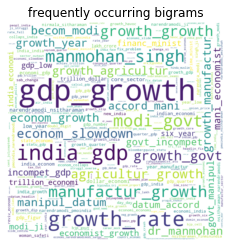

In [90]:

WC_height=700
WC_width=700
WC_max_words=250
 
wordCloud=WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,background_color="white")
 
wordCloud.generate_from_frequencies(word_dict_2)
 
plt.title("frequently occurring bigrams")
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Check the previous biagram and the recent one we can identify the difference. Gdp_groeth is still in the word cloud with that many new words are coming which making more sense.

## Clustering

In [91]:
from sklearn.feature_extraction.text import CountVectorizer

In [92]:
df2['cleaned_text']=df2['cleaned_text'].apply(lambda x:cleanup_text(x,allowed_tags=[]))

In [93]:
df3=df2.drop_duplicates(subset=['cleaned_text'])

In [94]:
df3.shape

(3849, 6)

In [95]:
text=df3['cleaned_text'].tolist()

In [96]:
#create the transform
vectorizer = CountVectorizer()

# tokenize and build vocab
vectorizer.fit(text)

# summarize
#print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)

# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

(3849, 8526)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [97]:
from sklearn.cluster import KMeans

In [98]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(vector)
    Sum_of_squared_distances.append(km.inertia_)

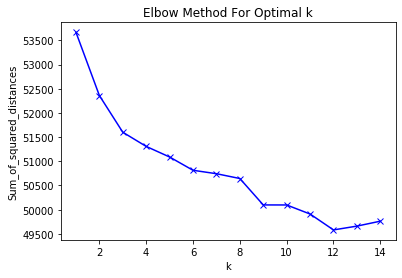

In [99]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [100]:
kmeans = KMeans(n_clusters=7).fit(vector)

In [101]:
df3['BoW_Clusters']=kmeans.labels_

C:\Users\Subhasmita Purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
df3['BoW_Clusters'].value_counts()

1    2181
4     439
5     408
3     371
2     245
0     204
6       1
Name: BoW_Clusters, dtype: int64

In [103]:
df3[df3['BoW_Clusters']==3].head(30)

,tweet,tweet_len,hashtags,cleaned_text,cleaned_text_len,cleaned_text_2,BoW_Clusters
15,"So, when are we stopping publishing of the #GD...",21,"[#GDP, #EconomicSlowdown]",stop publish datum draft gdp datum come today,12,datum draft gdp datum today,3
29,"Finally, they concede that EVMs CAN be tempere...",41,"[#BjpMuktBharat, #EconomicSlowdown]",final conced evm temper attempt chang topic to...,19,evm temper chang topic today debat digress dis...,3
46,Khan Market gang before releasing the GDP numb...,27,"[#EconomicSlowdown, #GDP]",khan market gang relea gdp number today sardes...,22,khan market gang gdp number today sagarikaghos...,3
56,5% of today's Indian GDP may be 7% of 2013's I...,21,"[#India, #EconomicSlowdown]",today indian gdp may indian gdp cnbccomind i...,15,today gdp indian gdp cnbccomind iaqgdpfiscalhtml,3
68,October Core sector output contracts 5.8% . Co...,47,[#EconomicSlowdown],octob core sector output contract core sector ...,35,octob core sector output contract core sector ...,3
87,GDP - 4.5 %\n\nRecession not too far\n\n@nsith...,12,"[#recession, #EconomicSlowdown, #gdp]",gdp recess far nsitharaman,8,gdp recess nsitharaman,3
89,F L A S H \n\nGDP falls all time low in second...,15,[#EconomicSlowdown],f l h gdp fall time low second quarter,11,f l h gdp time quarter,3
94,GDP@4.5% @PMOIndia #EconomicSlowdown thank...,13,"[#EconomicSlowdown, #achedinaagaye]",gdp pmoindia thank modi ji,6,gdp pmoindia modi ji,3
102,Modi should try one more Demonetisation or ca...,31,"[#ModiHaiToMumkinHai, #ModiMadeDisaster, #Econ...",modi tri one demonetis loan waiver corpor make...,18,modi tri one loan waiver corpor gdp figur ndtv...,3
103,@ navikakumar ma'am please inform me when Pak...,25,[#EconomicSlowdown],navikakumar maam plea inform pakistan go attac...,15,navikakumar maam plea pakistan btw gdp matter,3


Clustering using TF-IDF

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [105]:
# create the transform
tfidf_vectorizer = TfidfVectorizer()

# tokenize and build vocab
tfidf_vectorizer.fit(text)

# summarize
#print(vectorizer.vocabulary_)
#print(vectorizer.idf_)
# encode document
tfidf_vector = tfidf_vectorizer.transform(text)

# summarize encoded vector
print(tfidf_vector.shape)
print(tfidf_vector.toarray())

(3849, 8526)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [106]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(tfidf_vector)
    Sum_of_squared_distances.append(km.inertia_)

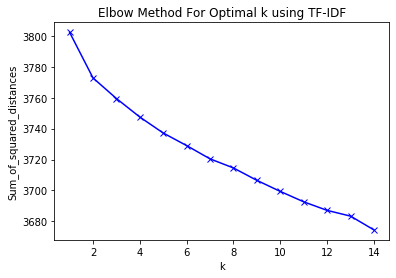

In [107]:
plt.plot(K, Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k using TF-IDF')
plt.show()

In [108]:
kmeans_tfidf = KMeans(n_clusters=12).fit(tfidf_vector)

In [109]:
df3['TfIdf_Clusters']=kmeans_tfidf.labels_

C:\Users\Subhasmita Purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
df3['TfIdf_Clusters'].value_counts()

0     1563
1      325
2      266
6      249
4      241
11     211
3      202
9      194
7      189
8      178
5      132
10      99
Name: TfIdf_Clusters, dtype: int64

In [111]:
df3[df3['TfIdf_Clusters']==3].head(20)

,tweet,tweet_len,hashtags,cleaned_text,cleaned_text_len,cleaned_text_2,BoW_Clusters,TfIdf_Clusters
6,# Modi Govt in deep slumber just like the #Ec...,38,"[#Economy, #nirmalatai, #EconomicSlowdown, #So...",modi govt deep slumber read fairi tale riareve...,25,modi govt slumber fairi tale riareveal nandtar...,1,3
14,The bad news is getting worse for India’s econ...,26,"[#EconomicSlowdown, #Modi]",bad news bad india 's economi prime minist nar...,18,news india economi prime minist narendra modi ...,4,3
94,GDP@4.5% @PMOIndia #EconomicSlowdown thank...,13,"[#EconomicSlowdown, #achedinaagaye]",gdp pmoindia thank modi ji,6,gdp pmoindia modi ji,3,3
102,Modi should try one more Demonetisation or ca...,31,"[#ModiHaiToMumkinHai, #ModiMadeDisaster, #Econ...",modi tri one demonetis loan waiver corpor make...,18,modi tri one loan waiver corpor gdp figur ndtv...,3,3
152,Modi as a tokenism will do cabinet reshuffle. ...,18,"[#EconomicSlowdown, #IndiaunderRecession]",modi token cabinet reshuffl vasooli bai ib min...,10,modi cabinet reshuffl vasooli bai ministri,1,3
172,# EconomicSlowdown ...in Modi era\nOnion becom...,33,[],modi era onion becom pomegran tamatoo becom ap...,26,modi era onion becom pomegran tamatoo becom ap...,1,3
224,# EconomicSlowdown just 4.5 Lowest in 6 Year ...,13,[],low year tenur modi regeem,8,year tenur modi regeem,0,3
227,# EconomicSlowdown enjoy it's Modi Era 4.5 .....,10,[],enjoy modi era,7,modi era,1,3
244,Congrats Modi’s Voodoo Economists feat arresti...,13,"[#GDPgrowth, #EconomicSlowdown, #recessionindia]",congrat modi 's voodoo economist feat arrest g...,9,congrat modi voodoo economist feat arrest gdp ...,5,3
262,# EconomicSlowdown ...in Modi era\nOnion becom...,45,[],modi era onion becom pomegran tamatoo becom ap...,39,modi era onion becom pomegran tamatoo becom ap...,1,3


cluster size 3 looks good moving ahead for sentiment analysis

Sentiment Analysis

In [112]:
#!pip install vaderSentiment

In [113]:
#!pip install nltk

In [114]:
#nltk.download()

In [115]:
from nltk.sentiment import vader
from nltk.sentiment.util import *

from nltk import tokenize

sid = vader.SentimentIntensityAnalyzer()

To understand what people talk about Economic slowdown and Gdo growth we are doing sentiment analysis. Basicallu it's about their opinion on GDP growth and economic slodown and express there expectation or dissatisfaction about the current Govt.

In [118]:
df3['sentiment_compound_polarity']=df3['tweet'].apply(lambda x:sid.polarity_scores(x)['compound'])

df3['sentiment_negative']=df3['tweet'].apply(lambda x:sid.polarity_scores(x)['neg'])
df3['sentiment_pos']=df3['tweet'].apply(lambda x:sid.polarity_scores(x)['pos'])
df3['sentiment']=''
df3.loc[df3.sentiment_compound_polarity>=0,'sentiment']="positive"
df3.loc[df3.sentiment_compound_polarity==0,'sentiment']="neutral"

df3.loc[df3.sentiment_compound_polarity<0,'sentiment']="negative"

C:\Users\Subhasmita Purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Subhasmita Purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Subhasmita Purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be se

In [119]:
df3.head()

,tweet,tweet_len,hashtags,cleaned_text,cleaned_text_len,cleaned_text_2,BoW_Clusters,TfIdf_Clusters,sentiment_compound_polarity,sentiment_negative,sentiment_pos,sentiment
0,Over Seven Thousand engineers had applied for ...,28,"[#economicslowdown, #nojobs, #hiddencapitalism...",seven thousand engin appli sanitari worker pos...,11,seven thousand engin appli sanitari worker pos...,4,0,0.0000,0.000,0.000,neutral
1,""" फोकसबाजी "" की भी लिमिट होती है। हद है। It ma...",23,"[#economyderailed, #EconomicSlowdown]",फोकसबाजी की भी लिमिट होती है । हद है । may goo...,17,भी होती है हद है । tool work economi,1,2,0.2382,0.000,0.085,positive
2,Optics doesn't works for economy.\n#EconomicSl...,12,[#EconomicSlowdown],optic work economi prashantagrvn statu …,9,work economi statu,1,9,0.0000,0.000,0.000,neutral
3,# BestOfBSOpinion | Tackling #EconomicSlowdow...,31,"[#EconomicSlowdown, #BSOpinion]",bestofbsopinion tackl cope fiscal impact domin...,20,bestofbsopinion tackl impact domin opinion pag...,1,0,-0.1280,0.057,0.000,negative
4,If the #RBI cuts #InterestRates during the D...,53,"[#RBI, #InterestRates, #MPC, #rate, #GDP, #Eco...",cut decemb meet longest cut spree least yr q ...,28,decemb meet spree yr q today watch rbi rbi bsi...,1,0,-0.4019,0.081,0.000,negative


In [120]:
df3['sentiment'].value_counts()

positive    1612
negative    1430
neutral      807
Name: sentiment, dtype: int64

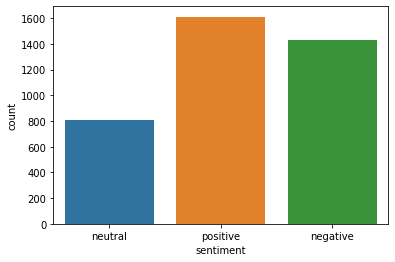

In [121]:
sns.countplot(df3['sentiment'])

In [122]:
df3[df3['sentiment']=="negative"].head()

,tweet,tweet_len,hashtags,cleaned_text,cleaned_text_len,cleaned_text_2,BoW_Clusters,TfIdf_Clusters,sentiment_compound_polarity,sentiment_negative,sentiment_pos,sentiment
3,# BestOfBSOpinion | Tackling #EconomicSlowdow...,31,"[#EconomicSlowdown, #BSOpinion]",bestofbsopinion tackl cope fiscal impact domin...,20,bestofbsopinion tackl impact domin opinion pag...,1,0,-0.1280,0.057,0.000,negative
4,If the #RBI cuts #InterestRates during the D...,53,"[#RBI, #InterestRates, #MPC, #rate, #GDP, #Eco...",cut decemb meet longest cut spree least yr q ...,28,decemb meet spree yr q today watch rbi rbi bsi...,1,0,-0.4019,0.081,0.000,negative
5,4/7. Nirmala Sitharaman refuses to admit to In...,42,"[#news, #economy, #EconomicSlowdown, #IndianEc...",nirmala sitharaman refus admit india recess w...,18,nirmala sitharaman refus india recess wednesda...,4,0,-0.9260,0.315,0.030,negative
7,With #bonuses cutdown #salaries delayed #emp...,44,"[#bonuses, #salaries, #employees, #earnings, #...",cutdown delay load expen go high msg go harsh...,30,cutdown delay load expen msg go line bjplive b...,1,0,-0.7778,0.206,0.000,negative
8,# India shock #GDP DECLINE=saw 4.2%-4.5% est...,45,"[#GDP, #Modi, #economy, #economicslowdown, #Ni...",india shock declinesaw estim trillion babbl sh...,38,india shock declinesaw estim trillion babbl na...,4,0,-0.1280,0.136,0.099,negative


### Conclusion
from the word cloud we concluded that people are mostly talking negative about the economic slowdown where as fron the clustering and Tf idf we conclude that people are postly talk positively about the Govt. At this time how Govt. trying hard to balnce the economic condistions by different policies. In most of the tweet they mention about Prime misister and the finance minister.